In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data.

In [4]:
observations = pd.read_csv('observations.csv',encoding='utf-8')
species = pd.read_csv('species_info.csv',encoding='utf-8')

# Data Exploration.

In [13]:
display(observations.head())
print(observations.info())

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [14]:
display(species.head())
display(species.info())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention
1,Mammal,Bos bison,"American Bison, Bison",No intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


None

In [6]:
data = pd.merge(observations, species, on='scientific_name')
print(data.head())
data.info()


      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch     No intervention  
4          Mammal                       American Mink     No intervention  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data column

# Data Cleaning.

In [81]:
data['conservation_status'].fillna('No intervention', inplace=True)

In [7]:
data.duplicated()
data = data.drop_duplicates()

# EDA.

# Biodiversity analysis:

In [51]:
grouped_data = data.groupby(['park_name'])['observations'].sum()
display(grouped_data)


park_name
Bryce National Park                     633043
Great Smoky Mountains National Park     473979
Yellowstone National Park              1584890
Yosemite National Park                  948460
Name: observations, dtype: int64

In [83]:
data.groupby(['category'])['observations'].sum()

category
Amphibian              45068
Bird                  331606
Fish                   72901
Mammal                162608
Nonvascular Plant     190653
Reptile                45822
Vascular Plant       2791714
Name: observations, dtype: int64

In [53]:
grouped_data02 = data.groupby(['park_name', 'category'])['observations'].sum().unstack()
display(grouped_data02)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7542,58590,12823,28830,32992,8141,484125
Great Smoky Mountains National Park,5876,42869,9482,21056,24857,5841,363998
Yellowstone National Park,19937,143535,31459,70189,83021,20061,1216688
Yosemite National Park,11713,86612,19137,42533,49783,11779,726903


<Figure size 1000x600 with 0 Axes>

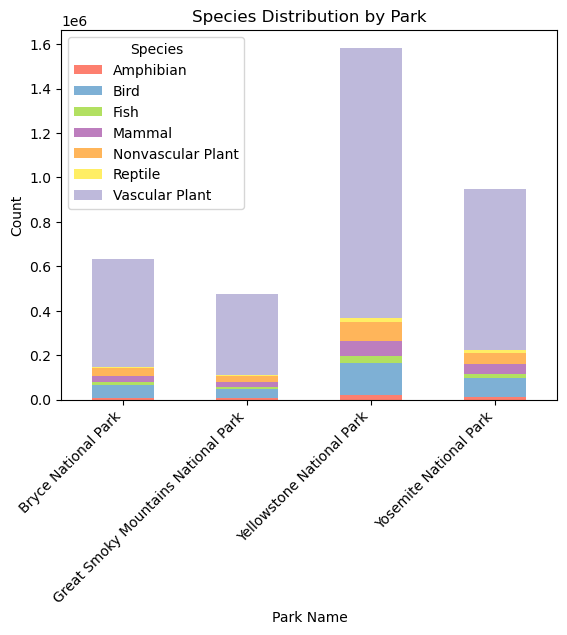

In [54]:
plt.figure(figsize=(10, 6))  
grouped_data02.plot(kind='bar', stacked=True, color=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db"]) 
plt.xlabel('Park Name')
plt.ylabel('Count')
plt.title('Species Distribution by Park')
plt.legend(title='Species')
plt.xticks(rotation=45, ha='right')  
plt.show()

Vascular plants emerge as the predominant species across all four parks, exhibiting a higher distribution ratio compared to other species. Conversely, amphibians and reptiles are notably less prevalent in comparison to the other species present.

Yellowstone leads in the number of observations compared to other parks.

With all seven species categories represented in each park, the data suggests a strong foundation of biodiversity within these ecosystems. 

# Conservation analysis:

# 1. Conservation by Species Category:

In [87]:
data.conservation_status.unique()

array(['No intervention', 'Species of Concern', 'Threatened',
       'Endangered', 'In Recovery'], dtype=object)

In [90]:
data.groupby('conservation_status').observations.count()

conservation_status
Endangered               80
In Recovery              24
No intervention       24721
Species of Concern      732
Threatened               44
Name: observations, dtype: int64

With the vast majority of observations falling into the "no intervention" category, it's clear that current conservation efforts in these parks are fairly limited. 

In [8]:
grouped_data03 = data[data['conservation_status'] != 'No intervention'].groupby(['conservation_status', 'category'])['observations'].count().unstack()
grouped_data03

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,4.0,16.0,12.0,44.0,NaN,NaN,4.0
In Recovery,NaN,12.0,NaN,12.0,NaN,NaN,NaN
Species of Concern,16.0,320.0,16.0,168.0,20.0,20.0,172.0
Threatened,8.0,NaN,20.0,8.0,NaN,NaN,8.0


<Figure size 1000x600 with 0 Axes>

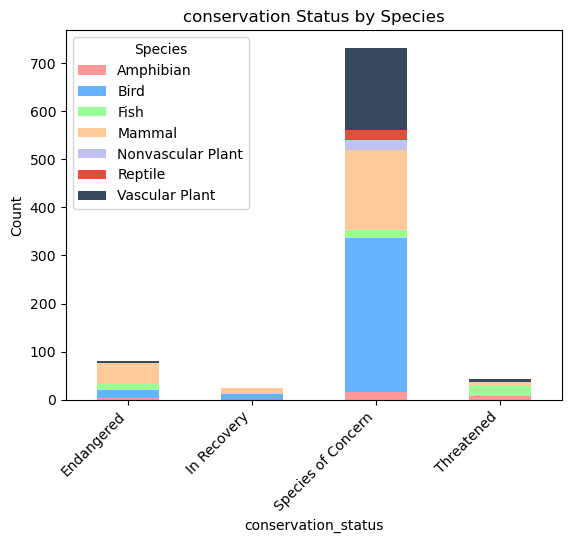

In [57]:
plt.figure(figsize=(10, 6))  
grouped_data03.plot(kind='bar', stacked=True, color=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#C2C2F0", "#E74C3C", "#34495E"]) 
plt.xlabel('conservation_status')
plt.ylabel('Count')
plt.title('conservation Status by Species')
plt.legend(title='Species')
plt.xticks(rotation=45, ha='right')  
plt.show()

Most of our species fall into the Species of Concern category.

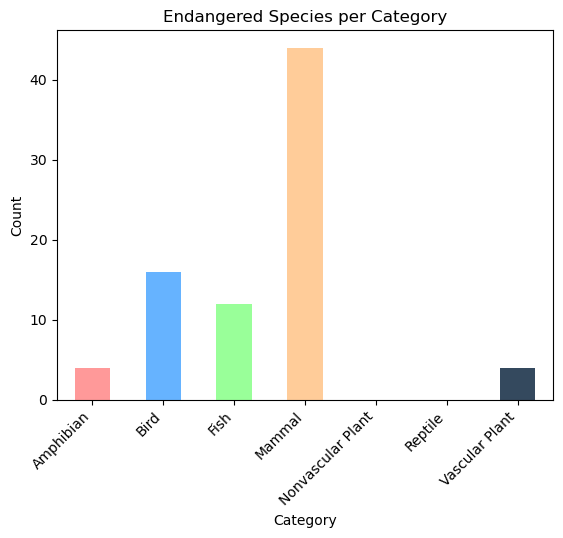

In [94]:
SelectedData = grouped_data03.iloc[0]
SelectedData.plot(kind='bar', color=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#C2C2F0", "#E74C3C", "#34495E"]) 
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Endangered Species per Category')
plt.xticks(rotation=45, ha='right')  
plt.show()

Mammals are the most endangered species, followed by birds while we don't record any Reptiles or Nonvascular Plants in this category.

# 2. Conservation by Park:

In [124]:
grouped_data04 = data[data['conservation_status'] != 'No intervention'].groupby(['park_name', 'conservation_status' ])['observations'].sum().unstack()
grouped_data04

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
park_name,,,,
Bryce National Park,619,388,17011,591
Great Smoky Mountains National Park,393,248,11735,440
Yellowstone National Park,1558,889,40677,1459
Yosemite National Park,943,582,24539,849


<Figure size 1000x600 with 0 Axes>

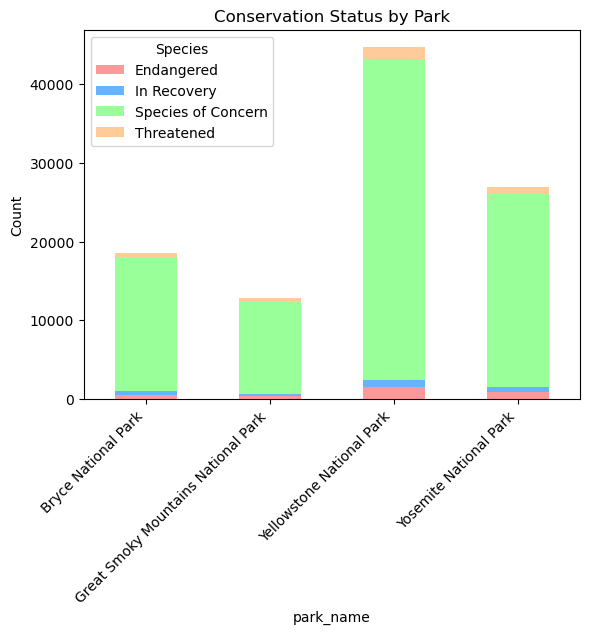

In [125]:

plt.figure(figsize=(10, 6))  
grouped_data04.plot(kind='bar', stacked=True, color=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]) 
plt.xlabel('park_name')
plt.ylabel('Count')
plt.title('Conservation Status by Park')
plt.legend(title='Species')
plt.xticks(rotation=45, ha='right')  
plt.show()

Analysis of conservation statuses reveals that "species of concern" is the most common category across all parks. Additionally, the proportions of other conservation categories appear to be relatively similar between parks.

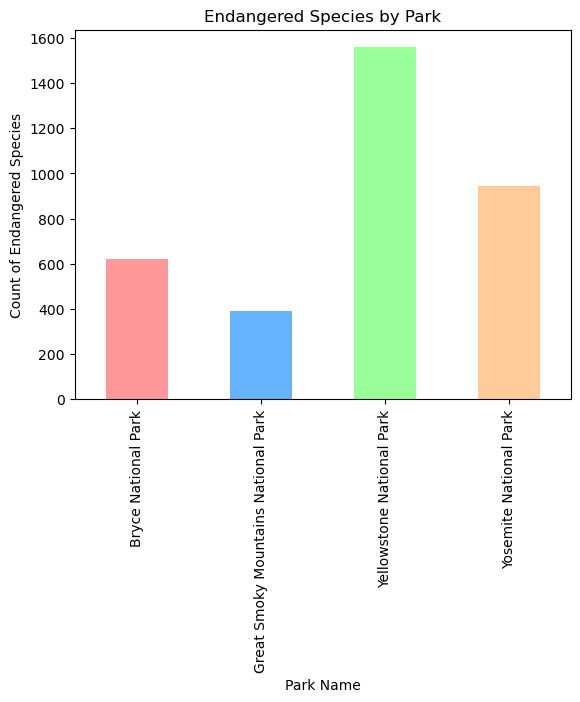

In [126]:
SelectedData = grouped_data04['Endangered']
SelectedData.plot(kind='bar',  stacked=True,color=["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]) 
plt.xlabel('Park Name')
plt.ylabel('Count of Endangered Species')
plt.title('Endangered Species by Park')
plt.xticks(rotation=90)  
plt.show()

In [127]:
grouped_data04['Endangered %'] = grouped_data04['Endangered'] / (grouped_data04['Endangered'] + grouped_data04['Threatened'] + grouped_data04['In Recovery'] +grouped_data04['Species of Concern'])* 100
grouped_data04

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,Endangered %
park_name,,,,,
Bryce National Park,619,388,17011,591,3.326347
Great Smoky Mountains National Park,393,248,11735,440,3.066479
Yellowstone National Park,1558,889,40677,1459,3.494606
Yosemite National Park,943,582,24539,849,3.503883


An initial glance at the data might suggest Yellowstone National Park harbors the most endangered species. However, upon closer examination, the proportion of endangered species sightings relative to total observations appears consistent across all parks.

In [120]:
grouped_data05 = data.groupby(['category', 'is protected'])['observations'].count().unstack()
grouped_data05['protection %'] = grouped_data05['yes']/(grouped_data05['yes'] + grouped_data05['no']) *100
grouped_data05


is protected,no,yes,protection %
category,,,
Amphibian,300,28,8.536585
Bird,2013,348,14.739517
Fish,476,48,9.160305
Mammal,966,232,19.365609
Nonvascular Plant,1312,20,1.501502
Reptile,304,20,6.172840
Vascular Plant,19350,184,0.941947


Conservation efforts appear to focus more on mammals and birds, with vascular and non-vascular plants receiving less intervention. 

The data reveals a disproportionately high number of observations in the 'No Intervention' category compared to other conservation categories across all species. This finding suggests a potential need for reevaluation of current conservation strategies and a possible shift towards more proactive interventions, particularly for vascular and nonvascular plants, which appear to have the lowest intervention rates.

In [128]:
grouped_data06 = data.groupby(['park_name', 'is protected'])['observations'].sum().unstack()
grouped_data06['protection %'] = grouped_data06['yes']/(grouped_data06['yes'] + grouped_data06['no']) *100
grouped_data06

is protected,no,yes,protection %
park_name,,,
Bryce National Park,614434,18609,2.939611
Great Smoky Mountains National Park,461163,12816,2.703917
Yellowstone National Park,1540307,44583,2.813003
Yosemite National Park,921547,26913,2.837547


The allocation of conservation efforts appears consistent among the parks.

This report analyzes the biodiversity and conservation status of four national parks based on existing data.

Biodiversity Analysis:

Vascular Plants: Vascular plants dominate across all parks, displaying the highest distribution compared to other species. This indicates a rich flora in these ecosystems.
Species Representation: All seven species categories are present in each park, suggesting a strong foundational biodiversity.
Yellowstone Observations: Yellowstone National Park leads in the number of observed species compared to other parks.

Conservation Analysis:

Limited Intervention: The majority of observations fall under the "no intervention" category, suggesting current conservation efforts are fairly limited.
Species of Concern: Most species fall under the "Species of Concern" category, highlighting their potential vulnerability. Mammals are the most endangered, followed by birds. Notably, reptiles and non-vascular plants are not recorded in the "Endangered" category.
Park-Level Conservation:"Species of Concern" is the most common category across all parks. Proportions of other categories appear similar between parks, although Yellowstone might initially appear to have more endangered species. However, a closer look reveals a consistent proportion of endangered sightings relative to total observations across all parks.
Focus on Mammals and Birds: Conservation efforts seem to prioritize mammals and birds, while vascular and non-vascular plants receive less intervention.
Key Findings:

The high number of observations in the "No Intervention" category across all species suggests a potential need to re-evaluate conservation strategies.
A shift towards more proactive interventions, especially for vascular and non-vascular plants, might be necessary.
Conservation efforts appear consistent across the parks.


These parks exhibit a strong foundation of biodiversity with all major species categories represented. However, the high number of species categorized as "Species of Concern" and the prevalence of "No Intervention" suggest potential for improvement in conservation efforts. By focusing on proactive interventions and strategically allocating resources, the parks can ensure the long-term health and sustainability of their ecosystems.